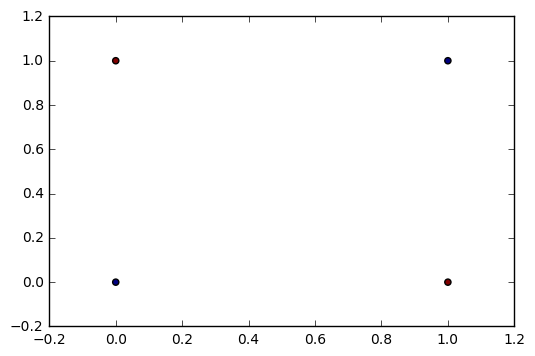

In [4]:
import numpy as np
import matplotlib.pyplot as plt

N = 4
D = 2

X= np.array( [ 
        [0,0], [0,1], [1,0], [1,1],
    ])
T = np.array([0,1,1,0])

ones = np.array([[1]*N]).T

plt.scatter(X[:,0], X[:,1], c=T)
plt.show()

In [7]:
xy = np.matrix(X[:,0] * X[:,1]).T
Xb = np.array(np.concatenate((ones,xy,X), axis=1))
print Xb

[[1 0 0 0]
 [1 0 0 1]
 [1 0 1 0]
 [1 1 1 1]]


In [8]:
# randomly initialize the weights
w = np.random.randn(D + 2)

# calculate the model output
z = Xb.dot(w)

def sigmoid(z):
    return 1/(1 + np.exp(-z))


Y = sigmoid(z)

# calculate the cross-entropy error
def cross_entropy(T, Y):
    E = 0
    for i in xrange(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E



In [9]:

# let's do gradient descent 100 times
learning_rate = 0.001
error = []
for i in xrange(10000):
    e = cross_entropy(T, Y)
    error.append(e)
    if i % 100 == 0:
        print e

    # gradient descent weight udpate with regularization
    w += learning_rate * ( Xb.T.dot(T - Y) - 0.01*w )

    # recalculate Y
    Y = sigmoid(Xb.dot(w))


3.08524263187
2.99151146691
2.91368012843
2.84847422789
2.79313913649
2.74544527117
2.70364059745
2.66637827865
2.63263913135
2.60166005368
2.57287328569
2.54585751515
2.52029988063
2.4959671505
2.4726842312
2.450318334
2.42876741146
2.40795176448
2.38780797778
2.36828455108
2.34933875821
2.33093439116
2.31304014008
2.29562842892
2.27867457701
2.26215619336
2.24605273713
2.23034519646
2.21501585169
2.20004809879
2.18542631566
2.17113575918
2.1571624842
2.14349327833
2.13011560821
2.11701757409
2.1041878706
2.09161575215
2.07929100176
2.06720390273
2.05534521245
2.04370613802
2.0322783134
2.02105377786
2.01002495559
1.99918463641
1.9885259574
1.97804238548
1.96772770078
1.95757598089
1.94758158582
1.93773914371
1.92804353725
1.91848989072
1.90907355772
1.89979010948
1.89063532377
1.88160517434
1.87269582093
1.86390359974
1.85522501445
1.84665672764
1.83819555266
1.82983844597
1.82158249981
1.81342493529
1.80536309586
1.79739444103
1.78951654054
1.78172706874
1.77402379934
1.76640460033


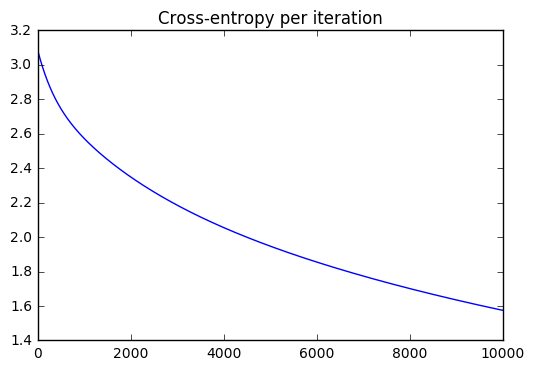

Final w: [-0.23460242 -3.10106953  1.09137455  0.96784069]
Final classification rate: 1.0


In [10]:
plt.plot(error)
plt.title("Cross-entropy per iteration")
plt.show()

print "Final w:", w
print "Final classification rate:", 1 - np.abs(T - np.round(Y)).sum() / N